# CMSC 478 Machine Learning


## Getting Started with Tensorflow, Keras, and Tensorboard

### Instructor: Fereydoon Vafaei

Jacob Enoch YU11019

This notebook helps you get started with Tensorflow/Keras API. **READ ALL SECTIONS VERY CAREFULLY!**

**Note**: You should install Tensorflow 2 before starting this notebook.<br> If you have not installed Tensorflow 2 or have installed previous versions of Tensorflow, you need to [install Tensorflow 2](https://www.tensorflow.org/install) before proceeding. Alternatively, you can install Tensorflow 2 using [conda environment](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/). CPU-only TensorFlow is sufficient for this course.

**RUN ALL CELLS REQUIREMENT**: You must run all cells to get the outputs and then attempt exercises. Otherwise, if any cell is not run with the correct output, your notebook gets ZERO.

<b>Course Policy Reminder:</b>
Debugging and error resolution are always students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

## Table of Contents:
* [Installation Verification](#Installation-Verification)
* [A Simple Regression NN](#A-One-Layer-One-Neuron-Regression-Neural-Network-using-Tensorflow/Keras)
* [A Multi-layer NN on MNIST Dataset](#A-Multi-Layer-NN-for-Multi-Class-Classification-on-MNIST-Dataset)
* [Eager Execution in Tensorflow-2](#Eager-Execution-in-Tensorflow-2)
* [Creating the model using the Sequential API](#Creating-the-model-using-the-Sequential-API)
* [Fashion MNIST Dataset](#Fashion-MNIST-Dataset)
* [California House Pricing](#California-House-Pricing)
* [Saving and Restoring the Models](#Saving-and-Restoring-the-Models)
* [Callbacks](#Callbacks)
* [Tensorboard](#Tensorboard)
* [Exercise-1](#Exercise-1)
* [Exercise-2](#Exercise-2)
* [References](#References)
* [Grading and Submission](#Grading-and-Submission)

Tensorflow is one of the most popular ML/DL frameworks. Watch this video first:

https://www.youtube.com/watch?v=744f60NyAgc

### Installation Verification

Verify your installation using the following cells.

**Note**: It is recommended that you install (or upgrade to) the latest stable version of tensorflow 2. While the minimum requirement for tf version for this notebook is 2.0.0 (which is needed to run the textbook and slides codes), it is your responsibility to update tf to the latest stable version for the assignments when/if needed. 

In [1]:
import tensorflow as tf

2022-04-18 22:41:22.017231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-18 22:41:22.017269: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow import keras

In [3]:
# Your tf/keras version should be 2.x.x (latest stable version is recommended)
tf.__version__

'2.8.0'

In [4]:
keras.__version__

'2.8.0'

In [5]:
# Also check that all important packages can be imported. 
# Note: If you use a separate conda environment for tf, you may need to reinstall some of these libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### A One-Layer One-Neuron Regression Neural Network using Tensorflow/Keras

Our first example is a regression NN with only one layer and one neuron to recognize the pattern of a sequence of numbers.

In [6]:
# A simple linear regression NN with one layer

# build a one-layer one-neuron NN
layer_1 = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_1])

# compile model
model.compile(optimizer='sgd', loss='mean_squared_error') # 'mse'

# data: y = 2x - 1
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float) 

# train NN
model.fit(xs, ys, epochs=1000)

2022-04-18 22:41:32.994342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-18 22:41:32.994368: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-18 22:41:32.994387: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jacob): /proc/driver/nvidia/version does not exist
2022-04-18 22:41:32.995533: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
1/1 [==============================] - 0s 484ms/step - loss: 1.9931
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.7118
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.4876
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.3083
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1644
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.0484
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.9545
Epoch 8/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8779
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.8150
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.7630
Epoch 11/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.7196
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6829
Epoch 13/1000
1/1 [===================

1/1 [==============================] - 0s 23ms/step - loss: 0.0917
Epoch 103/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0898
Epoch 104/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0880
Epoch 105/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0862
Epoch 106/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0844
Epoch 107/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0827
Epoch 108/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0810
Epoch 109/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0793
Epoch 110/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0777
Epoch 111/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0761
Epoch 112/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0745
Epoch 113/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0730
Epoch 114/1000
1/1 [=============

1/1 [==============================] - 0s 20ms/step - loss: 0.0115
Epoch 203/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 204/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 205/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 206/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0106
Epoch 207/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0104
Epoch 208/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 209/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0100
Epoch 210/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0097
Epoch 211/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 212/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0094
Epoch 213/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0092
Epoch 214/1000
1/1 [=============

1/1 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 303/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 304/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 305/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 306/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 307/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 308/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 309/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 310/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 311/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 313/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0011
Epoch 314/1000
1/1 [=================

1/1 [==============================] - 0s 4ms/step - loss: 1.9697e-04
Epoch 399/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.9293e-04
Epoch 400/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8897e-04
Epoch 401/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.8508e-04
Epoch 402/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.8128e-04
Epoch 403/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.7756e-04
Epoch 404/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.7391e-04
Epoch 405/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.7034e-04
Epoch 406/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.6684e-04
Epoch 407/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.6342e-04
Epoch 408/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.6006e-04
Epoch 409/1000
1/1 [==============================] - 0s 16ms/step - loss: 

1/1 [==============================] - 0s 14ms/step - loss: 2.7423e-05
Epoch 494/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.6860e-05
Epoch 495/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.6308e-05
Epoch 496/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.5767e-05
Epoch 497/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.5238e-05
Epoch 498/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.4720e-05
Epoch 499/1000
1/1 [==============================] - 0s 13ms/step - loss: 2.4211e-05
Epoch 500/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.3714e-05
Epoch 501/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.3227e-05
Epoch 502/1000
1/1 [==============================] - 0s 20ms/step - loss: 2.2750e-05
Epoch 503/1000
1/1 [==============================] - 0s 25ms/step - loss: 2.2283e-05
Epoch 504/1000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 3.8181e-06
Epoch 589/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.7398e-06
Epoch 590/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.6632e-06
Epoch 591/1000
1/1 [==============================] - 0s 38ms/step - loss: 3.5880e-06
Epoch 592/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.5141e-06
Epoch 593/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4421e-06
Epoch 594/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.3712e-06
Epoch 595/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3021e-06
Epoch 596/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2342e-06
Epoch 597/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.1677e-06
Epoch 598/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.1026e-06
Epoch 599/1000
1/1 [==============================] - 0s 11ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 5.3150e-07
Epoch 684/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.2063e-07
Epoch 685/1000
1/1 [==============================] - 0s 20ms/step - loss: 5.0986e-07
Epoch 686/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.9941e-07
Epoch 687/1000
1/1 [==============================] - 0s 12ms/step - loss: 4.8910e-07
Epoch 688/1000
1/1 [==============================] - 0s 8ms/step - loss: 4.7907e-07
Epoch 689/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.6929e-07
Epoch 690/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.5968e-07
Epoch 691/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.5012e-07
Epoch 692/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.4085e-07
Epoch 693/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.3187e-07
Epoch 694/1000
1/1 [==============================] - 0s 4ms/step - loss: 

1/1 [==============================] - 0s 10ms/step - loss: 7.3977e-08
Epoch 779/1000
1/1 [==============================] - 0s 12ms/step - loss: 7.2505e-08
Epoch 780/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.0981e-08
Epoch 781/1000
1/1 [==============================] - 0s 6ms/step - loss: 6.9544e-08
Epoch 782/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.8117e-08
Epoch 783/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.6704e-08
Epoch 784/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.5326e-08
Epoch 785/1000
1/1 [==============================] - 0s 12ms/step - loss: 6.3989e-08
Epoch 786/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.2680e-08
Epoch 787/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.1406e-08
Epoch 788/1000
1/1 [==============================] - 0s 23ms/step - loss: 6.0132e-08
Epoch 789/1000
1/1 [==============================] - 0s 8ms/step - loss:

1/1 [==============================] - 0s 14ms/step - loss: 1.0349e-08
Epoch 874/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.0140e-08
Epoch 875/1000
1/1 [==============================] - 0s 9ms/step - loss: 9.9432e-09
Epoch 876/1000
1/1 [==============================] - 0s 14ms/step - loss: 9.7303e-09
Epoch 877/1000
1/1 [==============================] - 0s 13ms/step - loss: 9.5209e-09
Epoch 878/1000
1/1 [==============================] - 0s 12ms/step - loss: 9.3391e-09
Epoch 879/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.1315e-09
Epoch 880/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.9488e-09
Epoch 881/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.7645e-09
Epoch 882/1000
1/1 [==============================] - 0s 20ms/step - loss: 8.5875e-09
Epoch 883/1000
1/1 [==============================] - 0s 10ms/step - loss: 8.4135e-09
Epoch 884/1000
1/1 [==============================] - 0s 13ms/step - lo

1/1 [==============================] - 0s 8ms/step - loss: 1.4513e-09
Epoch 969/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.4263e-09
Epoch 970/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.3950e-09
Epoch 971/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.3662e-09
Epoch 972/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.3358e-09
Epoch 973/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.3077e-09
Epoch 974/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.2849e-09
Epoch 975/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.2624e-09
Epoch 976/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.2351e-09
Epoch 977/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.2082e-09
Epoch 978/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.1863e-09
Epoch 979/1000
1/1 [==============================] - 0s 15ms/step - loss

In [7]:
# using NN, predict y when x=10.0
print("y_pred when x=10.0", model.predict([10.0]))

print("Parameters: {}".format(layer_1.get_weights()))

y_pred when x=10.0 [[18.999916]]
Parameters: [array([[1.999988]], dtype=float32), array([-0.9999638], dtype=float32)]


### A Multi-Layer NN for Multi-Class Classification on MNIST Dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
x_train[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# build a multi-layer NN for multi-class classification
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer - Use Flatten to make it a 1D vector
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer with 128 neurons
  tf.keras.layers.Dropout(0.2), # dropout is a regularization technique
  tf.keras.layers.Dense(10, activation='softmax')]) # output layer has 10 neurons and softmax activation function

# compile model for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # loss='SparseCategoricalCrossentropy'
              metrics=['accuracy'])

> **Notes**:

> These classifiers process vectors, which are 1D, whereas the current input is a rank-3 tensor (60000, 28, 28). To bridge the gap, we flatten the 3D inputs to 1D with a `Flatten` layer before adding the `Dense` layers.

> Use `loss='sparse_categorical_crossentropy'` loss function when there are two or more label classes. `tf` expects labels to be provided as integers. If you want to provide labels using `one-hot` representation, use `CategoricalCrossentropy` loss.

> Read more about the [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) and [`CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in their tf documentations.

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train NN
model.fit(x_train, y_train, epochs=5)

# test NN
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2958 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1420 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0765 - accuracy: 0.9763
313/313 - 0s - loss: 0.0807 - accuracy: 0.9752 - 415ms/epoch - 1ms/step


[0.08071020990610123, 0.9751999974250793]

The image classifier is now trained to ~98% accuracy on this dataset.

### Eager Execution in Tensorflow 2

Tensorflow 2 has this new capability of ["Eager Execution"](https://www.tensorflow.org/guide/eager) which makes it more convenient to work with tensors and graph computations. See examples below and compare it with tensorflow 1 which uses Session() and Run() to execute these operations.

In [13]:
x = tf.Variable(3, name="x")

In [14]:
y = tf.Variable(4, name="y")

In [15]:
f = x*x*y + y + 2

In [16]:
x

<tf.Variable 'x:0' shape=() dtype=int32, numpy=3>

In [17]:
y

<tf.Variable 'y:0' shape=() dtype=int32, numpy=4>

In [18]:
f

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [19]:
print(f)

tf.Tensor(42, shape=(), dtype=int32)


In [20]:
print(x.numpy())
print(y.numpy())
print(f.numpy())

3
4
42


### Creating the model using the Sequential API

Now let’s review the steps in building a neural network! Here is a classification MLP with two hidden
layers:

In [21]:
# build a NN for MNIST
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # the input layer
model.add(keras.layers.Dense(300, activation="relu")) # the first hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) # the 2nd hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) # the output layer: it's a 10-class classification

Let’s go through this code line by line:
- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data X , it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape` , which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape=[28,28]`

- Next we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

$$h_{\mathbf{W}, \mathbf{b}}(\mathbf{X}) = \phi (\mathbf{X} \mathbf{W} + \mathbf{b})$$

- Then we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a `Dense` output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).

> Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the keras.activations package. See https://keras.io/activations/ for the full list.

> Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [22]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

### Fashion MNIST Dataset

This is [another example of image classification](https://github.com/zalandoresearch/fashion-mnist).

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

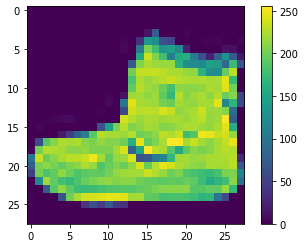

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

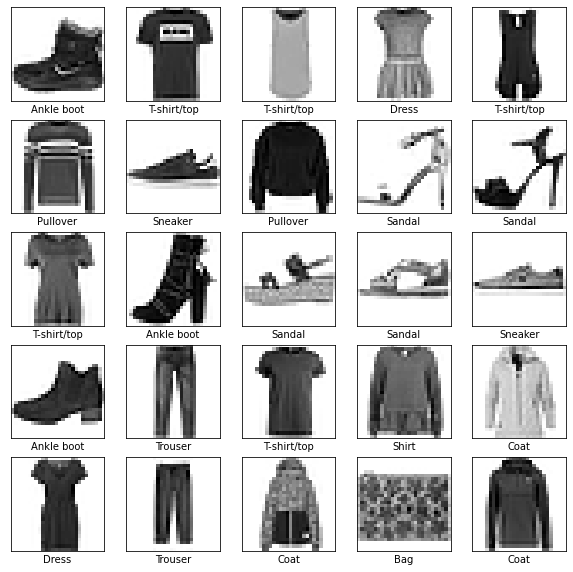

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [30]:
# build a multi-class classification NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]) # the output layer has 10 neurons and softmax activation

In [31]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5074 - accuracy: 0.8212 - val_loss: 0.4298 - val_accuracy: 0.8430
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3823 - accuracy: 0.8616 - val_loss: 0.3595 - val_accuracy: 0.8722
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3420 - accuracy: 0.8750 - val_loss: 0.3525 - val_accuracy: 0.8735
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3169 - accuracy: 0.8837 - val_loss: 0.3510 - val_accuracy: 0.8722
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2981 - accuracy: 0.8914 - val_loss: 0.3344 - val_accuracy: 0.8805
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2843 - accuracy: 0.8954 - val_loss: 0.3254 - val_accuracy: 0.8822
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2714 - accuracy: 0.8983 - val_loss: 0.3455 - val_accuracy:

> The `fit()` method returns a History object containing the training parameters `history.params`, the list of epochs it went through `history.epoch`, and most importantly a dictionary `history.history` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

In [33]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1688}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> If you use this dictionary to create a pandas `DataFrame` and call its `plot()` method, you get the learning curves:

(0.0, 1.0)

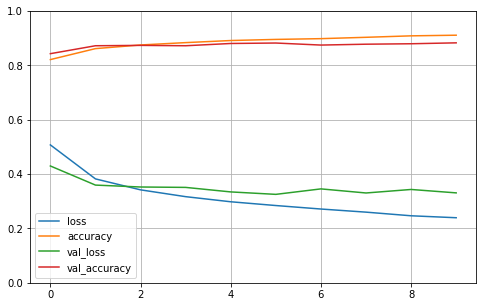

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3454 - accuracy: 0.8772 - 337ms/epoch - 1ms/step

Test accuracy: 0.8772000074386597


In [38]:
# ignore the warning if any
predictions = model.predict(test_images)

In [39]:
predictions[0]

array([2.7030362e-08, 1.7360540e-09, 1.9982622e-09, 2.2075419e-09,
       1.1619717e-08, 6.8660383e-03, 3.0194394e-07, 1.6523026e-02,
       2.8199074e-07, 9.7661030e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

> You can read more on MNIST fashion example [here](https://www.tensorflow.org/tutorials/keras/classification).

### California House Pricing

Next, we're going to build a regression model for Califronia house pricing.

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
# fetch data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [43]:
print(X_train.shape)
print(X_test.shape)

(11610, 8)
(5160, 8)


In [44]:
# build a regression NN
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # output layer with 1 neuron and with None activation function because it's regression
])

# compile NN
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8765 - val_loss: 3.4932
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 2.1389 - val_loss: 0.4570
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6027 - val_loss: 706.8928
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 1.2320 - val_loss: 0.3775
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3973 - val_loss: 0.3753
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3896 - val_loss: 0.3723
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3888 - val_loss: 0.3722
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3838 - val_loss: 0.3638
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3795 - val_loss: 0.3625
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3778 - val_loss: 0.36

In [45]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3739


In [46]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [47]:
y_pred

array([[2.5506446],
       [1.5555611],
       [1.2865729]], dtype=float32)

### Saving and Restoring the Models

When using the Sequential API or the Functional API, saving a trained Keras model is as simple as it gets:

In [48]:
model.save("my_keras_model.h5")

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

In [49]:
model = keras.models.load_model("my_keras_model.h5")

### Callbacks

What if training lasts several hours? This is quite common, especially when training on large datasets.

In this case, you should not only save your model at the end of training, but also save **checkpoints** at regular intervals during training, to avoid losing everything if your computer crashes.

How can you tell the `fit()` method to save **checkpoints**? Use **callbacks**.

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch.

Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint` .

In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. 

In [50]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
# compile model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

The following code is a simple way to implement **early stopping**:

In [52]:
# create checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [53]:
# train with callbacks and validation_data
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.9862 - val_loss: 0.8386
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7876 - val_loss: 0.6902
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6427
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6443 - val_loss: 0.5875
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6000 - val_loss: 0.5569
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5703 - val_loss: 0.5278
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5432 - val_loss: 0.5029
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5205 - val_loss: 0.4810
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5018 - val_loss: 0.4683
Epoch 10/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4879 - val_loss: 0.4567

In [54]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4763


> Another way to implement **early stopping** is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will optionally roll back to the best model.

> You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100


/home/jacob/ml/assignments/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 4ms/step - loss: 0.4750 - val_loss: 0.4492
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4675 - val_loss: 0.4377
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4581 - val_loss: 0.4387
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4533 - val_loss: 0.4344
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4475 - val_loss: 0.4402
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4447 - val_loss: 0.4173
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4350 - val_loss: 0.4180
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4301 - val_loss: 0.4123
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4255 - val_loss: 0.4102
Epoch 10/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4215 - val_loss: 0.4057
E

363/363 [==============================] - 2s 4ms/step - loss: 0.3444 - val_loss: 0.3366
Epoch 82/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3442 - val_loss: 0.3350
Epoch 83/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3437 - val_loss: 0.3371
Epoch 84/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3433 - val_loss: 0.3343
Epoch 85/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3431 - val_loss: 0.3344
Epoch 86/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3424 - val_loss: 0.3312
Epoch 87/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3420 - val_loss: 0.3336
Epoch 88/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3413 - val_loss: 0.3315
Epoch 89/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3415 - val_loss: 0.3328
Epoch 90/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3407 - val_loss: 

> If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect over‐fitting):

In [56]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [57]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

355/363 [============================>.] - ETA: 0s - loss: 0.3357
val/train: 0.97
363/363 [==============================] - 2s 4ms/step - loss: 0.3358 - val_loss: 0.3258


### Tensorboard

A neat feature of Tensorflow and Keras is visulaization through Tensorboard. The following code shows how you can visualize your training using Tensorboard.

In [58]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [59]:
# Tensorboard Visualization
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3353 - val_loss: 0.3266
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3345 - val_loss: 0.3259
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3343 - val_loss: 0.3266
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3337 - val_loss: 0.3258
Epoch 5/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3335 - val_loss: 0.3243
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3334 - val_loss: 0.3260
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3330 - val_loss: 0.3224
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3326 - val_loss: 0.3251
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3322 - val_loss: 0.3238
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3316 - val_loss: 0.3223

> Next, run the following command at the root of the project directory where `my_logs` has been saved (or from anywhere else, as long as you point to the appropriate log directory):

> `$ tensorboard --logdir=./my_logs --port=6006`

> And finally, once the server is up, you can open a web browser and go to:

> http://localhost:6006

## Exercise-1

**Exercise-1 has 10 points**.

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

- Imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k and so on.

- How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k.

**Hint**: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands'.

In [60]:
# create data with at least 6 data points for x and y
xs = np.array([0, 1, 2, 3, 4, 5, 6], dtype=float)
ys = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

In [61]:
# build model with one layer and one neuron
exercise_1_layer_1 = keras.layers.Dense(units=1, input_shape=[1])
exercise_1_model = tf.keras.Sequential([exercise_1_layer_1])

In [62]:
# compile model - be careful to use the correct loss for regression
exercise_1_model.compile(optimizer='sgd', loss='mean_squared_error')

In [63]:
# train model with 1000 epochs
exercise_1_model.fit(xs, ys, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 276ms/step - loss: 3.1569
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.7158
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9559
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5550
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3432
Epoch 6/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2310
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1713
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1393
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1218
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1121
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1064
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1028
Epoch 13/1000
1/1 [===================

1/1 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 103/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0345
Epoch 104/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0341
Epoch 105/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 106/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0333
Epoch 107/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0330
Epoch 108/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0326
Epoch 109/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0322
Epoch 110/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0318
Epoch 111/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0314
Epoch 112/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0311
Epoch 113/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0307
Epoch 114/1000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 203/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0107
Epoch 204/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0106
Epoch 205/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 206/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0103
Epoch 207/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0102
Epoch 208/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0101
Epoch 209/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 210/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0099
Epoch 211/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0098
Epoch 212/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 213/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0095
Epoch 214/1000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 303/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 304/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 305/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0032
Epoch 306/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 307/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0032
Epoch 308/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0031
Epoch 309/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 310/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0031
Epoch 311/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 312/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 313/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0030
Epoch 314/1000
1/1 [================

1/1 [==============================] - 0s 19ms/step - loss: 0.0010
Epoch 403/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 404/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010
Epoch 405/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0010
Epoch 406/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.9501e-04
Epoch 407/1000
1/1 [==============================] - 0s 6ms/step - loss: 9.8343e-04
Epoch 408/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.7199e-04
Epoch 409/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.6067e-04
Epoch 410/1000
1/1 [==============================] - 0s 18ms/step - loss: 9.4949e-04
Epoch 411/1000
1/1 [==============================] - 0s 5ms/step - loss: 9.3844e-04
Epoch 412/1000
1/1 [==============================] - 0s 9ms/step - loss: 9.2752e-04
Epoch 413/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.1673e-04
Epo

Epoch 498/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.3893e-04
Epoch 499/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.3499e-04
Epoch 500/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.3109e-04
Epoch 501/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.2723e-04
Epoch 502/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2343e-04
Epoch 503/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1966e-04
Epoch 504/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1594e-04
Epoch 505/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.1227e-04
Epoch 506/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0863e-04
Epoch 507/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.0504e-04
Epoch 508/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.0149e-04
Epoch 509/1000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 18ms/step - loss: 1.1146e-04
Epoch 594/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.1017e-04
Epoch 595/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0889e-04
Epoch 596/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.0762e-04
Epoch 597/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.0637e-04
Epoch 598/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.0513e-04
Epoch 599/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0390e-04
Epoch 600/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.0270e-04
Epoch 601/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.0150e-04
Epoch 602/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.0032e-04
Epoch 603/1000
1/1 [==============================] - 0s 19ms/step - loss: 9.9152e-05
Epoch 604/1000
1/1 [==============================] - 0s 13ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 3.6658e-05
Epoch 689/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.6231e-05
Epoch 690/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.5810e-05
Epoch 691/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.5393e-05
Epoch 692/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.4981e-05
Epoch 693/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.4574e-05
Epoch 694/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.4172e-05
Epoch 695/1000
1/1 [==============================] - 0s 19ms/step - loss: 3.3774e-05
Epoch 696/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.3381e-05
Epoch 697/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.2993e-05
Epoch 698/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2609e-05
Epoch 699/1000
1/1 [==============================] - 0s 20ms/step - lo

1/1 [==============================] - 0s 11ms/step - loss: 1.2056e-05
Epoch 784/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1916e-05
Epoch 785/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.1777e-05
Epoch 786/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.1640e-05
Epoch 787/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.1505e-05
Epoch 788/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1371e-05
Epoch 789/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1238e-05
Epoch 790/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.1108e-05
Epoch 791/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.0978e-05
Epoch 792/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0851e-05
Epoch 793/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.0724e-05
Epoch 794/1000
1/1 [==============================] - 0s 20ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 3.9650e-06
Epoch 879/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.9189e-06
Epoch 880/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8733e-06
Epoch 881/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.8282e-06
Epoch 882/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.7837e-06
Epoch 883/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.7397e-06
Epoch 884/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.6962e-06
Epoch 885/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.6531e-06
Epoch 886/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6106e-06
Epoch 887/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.5687e-06
Epoch 888/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.5272e-06
Epoch 889/1000
1/1 [==============================] - 0s 16ms/step - los

1/1 [==============================] - 0s 8ms/step - loss: 1.3041e-06
Epoch 974/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.2889e-06
Epoch 975/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2739e-06
Epoch 976/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.2590e-06
Epoch 977/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.2444e-06
Epoch 978/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.2299e-06
Epoch 979/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.2156e-06
Epoch 980/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2015e-06
Epoch 981/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.1875e-06
Epoch 982/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.1737e-06
Epoch 983/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.1600e-06
Epoch 984/1000
1/1 [==============================] - 0s 12ms/step - lo

In [64]:
# predict the price for 7-bedroom house price
print(exercise_1_model.predict([7.0]) * 100000) # Convert answer to hundreds of thousands

[[400113.96408081]]


## Exercise-2

**Exercise-2 has 20 points**.

In this notebook you learned how to do classification using Fashion MNIST, a data set containing items of clothing, and a similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy using `callbacks`.

- **Requirements**:
1. It should succeed in less than 10 epochs.
2. When it reaches 99% or greater it should print out the string `"Reached 99% accuracy so cancelling training!"` as specified in the `myCallback` class.

In [65]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist

# load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [66]:
# build model - be careful about the activation functions of the hidden layer and output layer
exercise_2_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]) # the output layer has 10 neurons and softmax activation

In [67]:
# compile model - be careful to use the correct loss for multi-class classification, metrics should be 'accuracy'
exercise_2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
# train model with 10 epochs (will stop earlier) and callbacks
# Note: Your output should include the message: "Reached 99% accuracy so cancelling training!"
# The output should also include:
# <tensorflow.python.keras.callbacks.History at MEMORY_ADDRESS> 
# create checkpoint
exercise_2_history = exercise_2_model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
exercise_2_history

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2583 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1119 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0358 - accuracy: 0.9889
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9911
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9911


### References

- [1] - [Tensorflow Website](https://www.tensorflow.org/)
- [2] - [Tensorflow Tutorials](https://www.tensorflow.org/tutorials)
- [3] - [Hands-On ML Textbook 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [4] - [DeepLearning.AI TensorFlow Developer Professional Certificate - Course-1](https://www.coursera.org/professional-certificates/tensorflow-in-practice)

## Grading and Submission

Name your notebook ```Lastname-tf-notebook.ipynb```. Submit the file using the ```tf-notebook``` link on Blackboard.

- tf-notebook has a total of 30 points which will be counted towards the "Assignment" section of your final grade.

- **RUN ALL CELLS REQUIREMENT**: You must run all cells to get the outputs and then attempt exercises. Otherwise, if any cell is not run with the correct output, your notebook gets ZERO even if you've completed the exercises.

Grading will be based on 

  * verification of correct installation of Tensorflow
  * error-free running of all the cells - all outputs and plots must be included - any missing output would cause the notebook to get ZERO!
  * correct answers to the exercises - Exercise-1 [10 points], Exercise-2 [20 points]
  
<font color=red><b>Due Date: Tuesday April 19th, 11:59PM</b></font>